In [1]:
import pandas as pd
import numpy as np
import re


---
# Inicio

In [2]:
#Cargamos los datos y vemos los primeros registros
data = pd.read_csv('data/listings.csv')
pd.set_option('display.max_columns', None)
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20220922013624,2022-09-22,city scrape,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within a few hours,100%,75%,f,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1,2,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.58184,-58.42415,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,10,39,314,2022-09-22,30,3,0,2012-07-02,2022-07-17,4.77,4.93,4.86,4.90,4.97,4.93,4.93,NaN,f,1,1,0,0,0.24
1,118877,https://www.airbnb.com/rooms/118877,20220922013624,2022-09-22,city scrape,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,NaN,https://a0.muscache.com/pictures/777724/21a535...,600320,https://www.airbnb.com/users/show/600320,Roxana,2011-05-18,"Buenos Aires, Argentina",Vivo en Palermo Hollywood hace mas de 20 años ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/37f1b...,https://a0.muscache.com/im/pictures/user/37f1b...,Palermo,2,11,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.57734,-58.43790,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730,2,2,730,730,2.0,730.0,NaN,t,0,0,0,174,2022-09-22,24,5,0,2011-10-17,2022-06-21,4.63,4.55,4.77,4.77,4.86,4.45,4.64,NaN,t,2,2,0,0,0.18
2,14222,https://www.airbnb.com/rooms/14222,20220922013624,2022-09-22,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,NaN,4,6,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,6,19,49,324,2022-09-22,98,8,0,2012-07-10,2022-08-14,4.77,4.74,4.76,4.78,4.89,4.88,4.73,NaN,f,3,2,1,0,0.79
3,120874,https://www.airbnb.com/rooms/120874,20220922013624,2022-09-22,city scra

---
# Vemos las columnas

In [3]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17947 entries, 0 to 17946
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17947 non-null  int64  
 1   listing_url                                   17947 non-null  object 
 2   scrape_id                                     17947 non-null  int64  
 3   last_scraped                                  17947 non-null  object 
 4   source                                        17947 non-null  object 
 5   name                                          17944 non-null  object 
 6   description                                   17435 non-null  object 
 7   neighborhood_overview                         10426 non-null  object 
 8   picture_url                                   17947 non-null  object 
 9   host_id                                       17947 non-null 

---
Eliminamos las columnas que no aportan informacion

Estructura del dataset e información acerca de las columnas

https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

'availability_30','availability_60','availability_90','availability_365',

In [4]:
data = data.drop(['id','source','listing_url','scrape_id','last_scraped','picture_url','host_id','host_url','host_name',
       'host_location','host_neighbourhood','reviews_per_month','neighborhood_overview','neighbourhood','neighbourhood_group_cleansed',
      'host_response_rate','host_thumbnail_url','host_about','host_response_time','host_response_rate',
      'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_listings_count',
      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
      'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated', 'calendar_last_scraped',
      'has_availability','host_response_time',
      'number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review',
      'review_scores_rating','review_scores_location','review_scores_accuracy','review_scores_cleanliness',
                  'review_scores_checkin','review_scores_communication','review_scores_value',
                  'license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
      'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
    ], axis=1)

 

    
    

In [5]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17947 entries, 0 to 17946
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       17944 non-null  object 
 1   description                17435 non-null  object 
 2   host_since                 17947 non-null  object 
 3   host_is_superhost          17947 non-null  object 
 4   host_total_listings_count  17947 non-null  int64  
 5   host_verifications         17947 non-null  object 
 6   host_has_profile_pic       17947 non-null  object 
 7   host_identity_verified     17947 non-null  object 
 8   neighbourhood_cleansed     17947 non-null  object 
 9   latitude                   17947 non-null  float64
 10  longitude                  17947 non-null  float64
 11  property_type              17947 non-null  object 
 12  room_type                  17947 non-null  object 
 13  accommodates               17947 non-null  int

In [6]:
data.head(5)

,name,description,host_since,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,instant_bookable
0,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,2009-10-01,f,2,"['email', 'phone']",t,t,Palermo,-34.58184,-58.42415,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125,0,10,39,314,f
1,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,2011-05-18,t,11,"['email', 'phone']",t,t,Palermo,-34.57734,-58.43790,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730,0,0,0,174,t
2,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,2016-08-03,f,6,"['email', 'phone']",t,t,Palermo,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125,6,19,49,324,f
3,Great apt 1 Bedroom - 1.5 Bath /Recoleta,<b>The space</b><br />This great apartment is ...,2011-04-23,t,29,"['email', 'phone']",t,t,Recoleta,-34.58991,-58.39931,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$6,514.00",14,1125,0,0,20,295,f
4,Spotless entire apt. Ideal location,Apartment is situated on 4th floor. There are ...,2011-03-06,t,8,"['email', 'phone']",t,f,Almagro,-34.61982,-58.41660,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$3,584.00",5,730,0,19,49,324,t


<AxesSubplot:title={'center':'Nulos por columna'}, ylabel='Columna'>

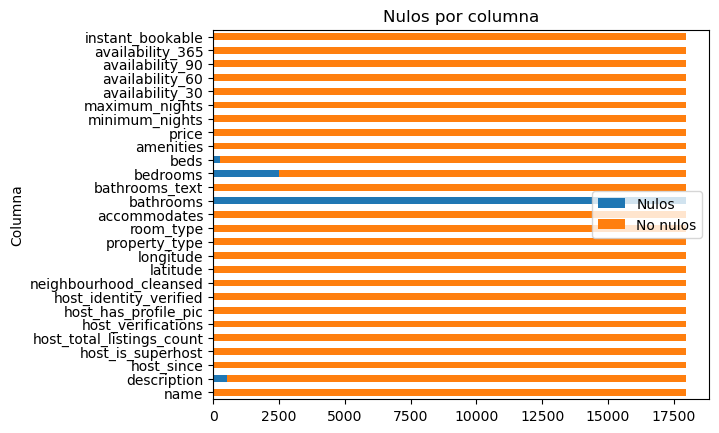

In [7]:
nulls = pd.DataFrame({'Columna':data.columns, 'Nulos':data.isnull().sum(),'No nulos':data.notnull().sum()})

# plot a Stacked Bar Chart using matplotlib
nulls.plot(
  x = 'Columna', 
  kind = 'barh', 
  stacked = True, 
  title = 'Nulos por columna', 
  mark_right = True)

Extraemos el tipo de baño y la cantidad

In [8]:
def extractBathRoomType(row):  
        if ("shared" in row["bathrooms_text"].lower()):
            return "shared"
        return "private"

def extractBathQuantity(row):  
        f = re.findall('\d*\.?\d+',row["bathrooms_text"])
        if (len(f)>0):
            return f[0]
        return "1"
    
data["bathrooms_text"] = data["bathrooms_text"].astype(str)
data["bathroomtype"] = data.apply(lambda x:extractBathRoomType(x),axis =1)   
data["bathrooms"] = data.apply(lambda x:extractBathQuantity(x),axis =1)   

data["bathrooms"] = data["bathrooms"].astype(float)
data["bathrooms"] = data["bathrooms"].apply(np.ceil)
data["bathrooms"] = data["bathrooms"].astype(int)
data = data.drop(['bathrooms_text'], axis=1)


In [9]:
data.bathrooms.value_counts()

1     13061
2      3836
3       770
4       131
5        45
0        32
6        26
9        17
7        16
8         6
10        3
13        1
11        1
22        1
16        1
Name: bathrooms, dtype: int64

Convertimos las columnas con true y false a números

In [10]:
data.replace({'f': 0, 't': 1}, inplace=True)

Columna Precio, quitamos el signo monetario

In [11]:
data.price = data.price.str[1:-3]
data.price = data.price.str.replace(",", "")
data.price = data.price.astype('int64')

Tomamos los amenities

In [32]:

amenities_list = list(data.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('\\u2013', '-').replace('\\u2019','´').replace('\\u00f3','ó')
amenities_list_string = amenities_list_string.replace('\\u00e9','é').replace('\\u00ed','í').replace('\\u00e1','á').replace('\\u00b4','').replace('\\u00f1','ñ')
amenities_list_string = amenities_list_string.replace('\\u00a0','')
amenities_list_string = amenities_list_string.replace("\\""","´´")
amenities_list_string = amenities_list_string.replace('{', '').replace('}', ',').replace('[', '').replace(']', ',').replace('"', '')

amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set


{'',
 'Fast wifi - 285 Mbps',
 'SONY sound system with aux',
 'Barbecue utensils',
 'Window guards',
 'Hot water kettle',
 'Fast wifi - 97 Mbps',
 'ATMA electric stove',
 'Fast wifi - 302 Mbps',
 'Varios shampoo',
 'Dos Anafes stove',
 'Private outdoor pool - rooftop',
 'Philco sound system with Bluetooth and aux',
 'Radiadores de agua',
 'Plusbelle',
 'All vegan and natural products conditioner',
 'open 24 hours',
 '5-10 years old',
 'Panasonic Bluetooth sound system',
 'Natura shampoo',
 'Changing table',
 'Shampoo shampoo',
 'Oven',
 'Backyard',
 'Shared pool -',
 'SAMSUNG DE ACERO NUEVA refrigerator',
 'Fast wifi - 122 Mbps',
 'Clothing storage: wardrobe and dresser',
 'Sachet Hotelero de bienvenida shampoo',
 'Lux / Dove body soap',
 '206´´ HDTV with Chromecast',
 'Lux/doove/suave body soap',
 'Free parking garage on premises - 1 space',
 'Samsung sound system with Bluetooth and aux',
 'and PS4',
 '24´´ TV with standard cable',
 'Shampoo marca Pantene shampoo',
 'Hotel - solid bod